## BCIS 5110 Analysis of JD Data

In [1]:
# This code appears in every demonstration Notebook.
# By default, when you run each cell, only the last output of the codes will show.
# This code makes all outputs of a cell show.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### We will analyze JD Data in the rest of our assignments.
The objective: to build models to accurately predict delivery times for customer orders.<br>
The data: We need the following tables from the JD.com data<br>
        1. Order<br>
        2. User<br>
        3. Delivery<br>
        4. Inventory<br>
        5. Network<br>        

1. Import necessary packages.

In [2]:
# the necessary package needed for this assignment is pandas
import pandas as pd
import numpy as np

2. Read in the five csv files.

In [3]:
# to read the csv file data we use pd.read_csv("loaction or path"+ "file_name")
order= pd.read_csv("D:\JD Data\JD_order_data.csv")
user= pd.read_csv("D:\JD Data\JD_user_data.csv")
delivery= pd.read_csv("D:\JD Data\JD_delivery_data.csv")
inventory= pd.read_csv("D:\JD Data\JD_inventory_data.csv")
network= pd.read_csv("D:\JD Data\JD_network_data.csv")

3. Display a sample of each data frame. How many observations? How many columns? What are the column names? (Use code to display such information.)

In [4]:
datafiles= {'order': order, 'user': user, 'delivery': delivery, 'inventory': inventory, 'network':network}
# we can a for loop that iterates through each key value pair in the datafiles 
for data_title, df in datafiles.items():
    #data_title will represents the key value which are the names of the datafiles
    print("\n-------\n sample of", data_title, "datafile:")
    print(df.head(3)) # head(3) means it prints 1st 3 rows of the datafile 


-------
 sample of order datafile:
     order_ID     user_ID      sku_ID  order_date             order_time  \
0  d0cf5cc6db  0abe9ef2ce  581d5b54c1  2018-03-01  2018-03-01 17:14:25.0   
1  7444318d01  33a9e56257  067b673f2b  2018-03-01  2018-03-01 11:10:40.0   
2  f973b01694  4ea3cf408f  623d0a582a  2018-03-01  2018-03-01 09:13:26.0   

   quantity  type promise  original_unit_price  final_unit_price  \
0         1     2       -                 89.0              79.0   
1         1     1       2                 99.9              53.9   
2         1     1       2                 78.0              58.5   

   direct_discount_per_unit  quantity_discount_per_unit  \
0                       0.0                        10.0   
1                       5.0                        41.0   
2                      19.5                         0.0   

   bundle_discount_per_unit  coupon_discount_per_unit  gift_item  dc_ori  \
0                       0.0                       0.0          0       4 

In [5]:
for data_title, df in datafiles.items():
    # to observe how many observations in a data we use len() which counts the number of rowsin the datafile
    print("Number of observations in", data_title, "datafile is:", len(df))
    # to find number of columns we can use df.columns so it will show the count of the number of columns in data file
    print("Number of columns in", data_title, "datafile is", len(df.columns))
    # list() shows the  column names
    print('column names in', data_title,'datafile is', list(df.columns))

Number of observations in order datafile is: 549989
Number of columns in order datafile is 17
column names in order datafile is ['order_ID', 'user_ID', 'sku_ID', 'order_date', 'order_time', 'quantity', 'type', 'promise', 'original_unit_price', 'final_unit_price', 'direct_discount_per_unit', 'quantity_discount_per_unit', 'bundle_discount_per_unit', 'coupon_discount_per_unit', 'gift_item', 'dc_ori', 'dc_des']
Number of observations in user datafile is: 457298
Number of columns in user datafile is 10
column names in user datafile is ['user_ID', 'user_level', 'first_order_month', 'plus', 'gender', 'age', 'marital_status', 'education', 'city_level', 'purchase_power']
Number of observations in delivery datafile is: 293229
Number of columns in delivery datafile is 6
column names in delivery datafile is ['package_ID', 'order_ID', 'type', 'ship_out_time', 'arr_station_time', 'arr_time']
Number of observations in inventory datafile is: 136079
Number of columns in inventory datafile is 3
column n

4. Check for missing values of columns of each dataframe. You can use sum() (instead of any()) to find out the number of missing values. Which variables have missing values?

In [6]:
datafiles= {'order': order, 'user': user, 'delivery': delivery, 'inventory': inventory, 'network':network}
for data_title, df in datafiles.items():
    # as we know isnull() gives the missing values and sum() sum of the values u have selected . now we use isnull().sum() to get the count of null values in the datafiles
    print('\nMissing values in', data_title, 'datafile:')
    Missing_values= df.isnull().sum()
    # lets use if statement to specify whether the data has missing values or not
    if Missing_values.sum() == 0:
        print('There are no missing values in the data.')
    else:
        print(Missing_values[missing_values > 0])# here I will print the count of null values 
    print() 


Missing values in order datafile:
There are no missing values in the data.


Missing values in user datafile:
There are no missing values in the data.


Missing values in delivery datafile:
There are no missing values in the data.


Missing values in inventory datafile:
There are no missing values in the data.


Missing values in network datafile:
There are no missing values in the data.



5. Check the promise variable in orders table. What unusual values do you notice? What do you think it means?

In [7]:
# to observe the unusual value in data first we need to know what different are present in the data
print('Unique values in the "promise" column:')
print(order['promise'].unique())

Unique values in the "promise" column:
['-' '2' '1' '3' '4' '5' '6' '7' '8']


6. How many observations for each value in 'promise' variable? What information can you draw from this?

In [8]:
# we can use value_counts() fn that is used to get count of unique values of a column
promise_value_count = order['promise'].value_counts()
print("Number of observations for each value in 'promise' variable:")
print(promise_value_count)

Number of observations for each value in 'promise' variable:
-    208583
1    157509
2    109990
3     33176
4     23882
5     10054
6      3039
8      2374
7      1382
Name: promise, dtype: int64


7. Select only two variables: 'type' and 'promise' from order table. Sort it by variable 'type' in descending order. What do you observe from the results? (check the first 10 and last 10 observations.) Think about the meaning of the type variable.

In [9]:
# the syntax of sorting by variable in datafile is Dataframe.sort_values(by, ascending)
selected_data = order[['type', 'promise']].sort_values(by= 'type', ascending=False)
print("First 10 observations:")
print(selected_data.head(10)) # here head(10) prints first 10 rows of the ddata
print("Last 10 observations:")
print(selected_data.tail(10)) # the tail(10) prints last 10 rows of the data

First 10 observations:
        type promise
0          2       -
308329     2       -
308358     2       -
308357     2       -
308356     2       -
308355     2       -
308354     2       -
308353     2       -
308352     2       -
308351     2       -
Last 10 observations:
        type promise
334636     1       1
334633     1       1
334626     1       1
334632     1       1
334631     1       1
116820     1       2
116821     1       2
116822     1       1
334627     1       1
274994     1       2


8. Merge order and delivery tables, using inner merge. What does inner merge mean? How many observations are there in the merged dataset? Compared with the number of observations in the original order and delivery table, what can you say about the match between orders and deliveries?

In [10]:
# the syntax for merging two datasets is df.merge(right, how='', on=[])
# right = datasets we need to merge , how mwns type of merge to be performed and n means column name to join and it must be found in both the datafiles
merged_data= pd.merge(order, delivery, how='inner', on=['order_ID'])
print('Number of observations in merged_data', len(merged_data))
print('Number of observations in order_data',len(order))
print('Number of observations in delivery_data', len(delivery))

Number of observations in merged_data 326862
Number of observations in order_data 549989
Number of observations in delivery_data 293229


9. Merge order and delivery tables, using right merge. What does right merge mean? How many obervations are there in the merged dataset? Do all delivery records have matched order information?

In [11]:
# the syntax for merging two datasets is df.merge(right, how='', on=[])
# right = datasets we need to merge , how mwns type of merge to be performed and n means column name to join and it must be found in both the datafiles
r_merged_data= pd.merge(order, delivery, how='right', on=['order_ID'])
print('Number of observations in r_merged_data:', len(r_merged_data))
# if the length of merged data is equal to length of delivery data . It says that all delivery data have matched order information
if len(r_merged_data) == len(delivery):
    print('All delivery records have matched order information')
else:
    print('There are no delivery records that match order information')

Number of observations in r_merged_data: 326862
There are no delivery records that match order information


10. Merge order and delivery tables, using left merge. What does left merge mean? How many obervations are there in the merged dataset? Compare the number of observations of the merged table with the original order table, what can you say about the match between orders and deliveries?

In [12]:
# the syntax for merging two datasets is df.merge(right, how='', on=[])
# right = datasets we need to merge , how mwns type of merge to be performed and n means column name to join and it must be found in both the datafiles
L_merged_data= pd.merge(order, delivery, how='left', on=['order_ID'])
print('Number of observations in L_merged_data:', len(L_merged_data))
if len(L_merged_data) == len(order):
    print('All orders have corresponding delivery data')
else:
    print('There are difference or gaps between order and delivery data')

Number of observations in L_merged_data: 550017
There are difference or gaps between order and delivery data


In this part, we prepare the 
## Data for analysis.

11. First, we need to clean the merged order and delivery table.<br>
Identify the table from the inner merge in Q8. Take a look at it. You may find there are two variables: type_x and type_y, which were not in the original two tables.<br>
The reason is that there is a type variable in both orders and delivery tables. The merge keeps both and assigned x and y suffix to them.<br>
Check the meaning of the two variables in our data description.<br>
To make the two variables consistent, we can replace the values of one variable to match the other.

In [13]:
print(list(order))
print('\n------\n',list(delivery))
print('\n------\n',list(merged_data))

['order_ID', 'user_ID', 'sku_ID', 'order_date', 'order_time', 'quantity', 'type', 'promise', 'original_unit_price', 'final_unit_price', 'direct_discount_per_unit', 'quantity_discount_per_unit', 'bundle_discount_per_unit', 'coupon_discount_per_unit', 'gift_item', 'dc_ori', 'dc_des']

------
 ['package_ID', 'order_ID', 'type', 'ship_out_time', 'arr_station_time', 'arr_time']

------
 ['order_ID', 'user_ID', 'sku_ID', 'order_date', 'order_time', 'quantity', 'type_x', 'promise', 'original_unit_price', 'final_unit_price', 'direct_discount_per_unit', 'quantity_discount_per_unit', 'bundle_discount_per_unit', 'coupon_discount_per_unit', 'gift_item', 'dc_ori', 'dc_des', 'package_ID', 'type_y', 'ship_out_time', 'arr_station_time', 'arr_time']


In [14]:
print('unique values in type_x:' , merged_data['type_x'].unique())
print('unique values in type_y:' , merged_data['type_y'].unique())

unique values in type_x: [1 2]
unique values in type_y: [1 0]


Then compare the values of the two variables are the same.

In [15]:
# to compare i will write an if condition
if merged_data['type_x'].all() == merged_data['type_y'].all():
    print('Values are same')
else:
    print('values are different')

values are different


If they are, please drop one of them.

In [16]:
merged_data['type_x']= merged_data['type_y']
# here i have replaced the values of one variable with the other
print('type_x values',merged_data['type_x'].unique())
print('type_y values',merged_data['type_y'].unique())
merged_data=merged_data.drop(columns=['type_y'])
# Here i have droped the column of type_y
# to avoid the confusion i will just name type_x as just type by using rename fynction
merged_data=merged_data.rename(columns={'type_x':'type'})
print('the values in type:', merged_data['type'].unique())

type_x values [1 0]
type_y values [1 0]
the values in type: [1 0]


12. We need to remove the orders that <br>
1) has a single item; <br>
2) the item is a gift item;<br>

The reason is that those orders might have come from other product categories and only use products from current category as a gift. We do not have information about those orders.

We first find orders with order_ID only appears once in the data, which indicates this order contains a single item.<br>
Hint: you may use .duplicated() method to mark that. Think about which value of the argument 'keep' you want to choose. Consider saving the outcome as a variable.

In [17]:
# here first we need to identify the orders with only single item
# I will use .duplicated() function on the 'order_ID' column to get duplicate orders.
singleitem_orders=merged_data['order_ID'].duplicated(keep=False)
# This variable will be true for duplicate orders so I used false to find item without any duplicates
print(singleitem_orders.head(15).reset_index())

    index  order_ID
0       0     False
1       1     False
2       2     False
3       3     False
4       4     False
5       5      True
6       6      True
7       7      True
8       8      True
9       9      True
10     10      True
11     11     False
12     12     False
13     13     False
14     14     False


Then we filter the data to remove those orders of a single gift item. Save the changes.

In [18]:
# here I will use the groupby function on the 'order_ID' column to group the data by orders
# As the question addressed I will use transform function with count function to create a new column and I will name that as item_count
merged_data['item_count']=merged_data.groupby('order_ID')['type'].transform('count')
# By using boolean indexing here we can filter out the rows where 'item_count' is >1
filter_data=merged_data[merged_data['item_count']>1]
#now lets drop the 'item_count' column as we created it for filtering purpose
filter_data=filter_data.drop(columns=['item_count'])
print(filter_data['gift_item'].reset_index())

        index  gift_item
0           5          1
1           6          0
2           7          0
3           8          0
4           9          0
...       ...        ...
61648  326815          0
61649  326817          0
61650  326818          0
61651  326835          0
61652  326836          0

[61653 rows x 2 columns]


13. Next, we remove orders with multiple packages. Hint: You may groupby order_ID, find the number of unique package_ID ('nunique') and then use transform() to broadcast the value to all record. Save the results as a new variable. Use the variable value to filter.

In [19]:
# here i will use the groupby fn on the 'order_ID' column to group the data by orders
# Now I will use nunique fn to find the number of unique 'Package_ID' for each order
filter_data['unique_package_count']=filter_data.groupby('order_ID')['package_ID'].transform('nunique')
# now I will use boolean indexing to filter out rows where the count of unique packages is >1 and i will save that as final_data
final_data= filter_data[filter_data['unique_package_count']== 1]
#now we will drop the 'unique_package_count' column as it was created for filtering purpose
final_data=final_data.drop(columns=['unique_package_count'])
print(final_data.head(10))

      order_ID     user_ID      sku_ID  order_date             order_time  \
5   89286e5fd9  79154d0001  6717b7c979  2018-03-01  2018-03-01 22:18:41.0   
6   89286e5fd9  79154d0001  01c9d91829  2018-03-01  2018-03-01 22:18:41.0   
7   72585b87a6  d5e8910932  d829f03a28  2018-03-01  2018-03-01 15:28:49.0   
8   72585b87a6  d5e8910932  5f58bfd286  2018-03-01  2018-03-01 15:28:49.0   
9   9c65b6264b  2021a86702  068f4481b3  2018-03-01  2018-03-01 00:12:07.0   
10  9c65b6264b  2021a86702  d3e31fdd6e  2018-03-01  2018-03-01 00:12:07.0   
21  67b8f778f6  53dc20e68d  a0e49f9966  2018-03-01  2018-03-01 23:17:02.0   
22  67b8f778f6  53dc20e68d  c98d32ff09  2018-03-01  2018-03-01 23:17:02.0   
27  4d91f1ff1a  3f399e9323  d3e31fdd6e  2018-03-01  2018-03-01 23:10:35.0   
28  4d91f1ff1a  3f399e9323  068f4481b3  2018-03-01  2018-03-01 23:10:35.0   

    quantity  type promise  original_unit_price  final_unit_price  ...  \
5          1     1       1                  0.0               0.0  ...   
6   

14. Now we process time-related variables: order_date, order_time, ship_out_time, arr_station_time, and arr_time. <br>
First change all of them to Timestamp data type. <br>
Get the day of the month from the order_date and save it to a new variable 'order_day'. <br>
Get the hour of the order_time and save it to a new variable 'order_hour'.<br>
Caculate the delivery time by minus arr_time with order_time. <br>

In [20]:
# i will use the pd.to_datetime function to convert the required columns to the timestamp data type
merged_data['order_date']= pd.to_datetime(merged_data['order_date'])
merged_data['order_time']= pd.to_datetime(merged_data['order_time'])
merged_data['ship_out_time']= pd.to_datetime(merged_data['ship_out_time'])
merged_data['arr_station_time']= pd.to_datetime(merged_data['arr_station_time'])
merged_data['arr_time']= pd.to_datetime(merged_data['arr_time'])

In [21]:
# now i will extract day of the month from the order_date and save it to a new variable 'order_day'
merged_data['order_day']= merged_data['order_date'].dt.day

In [22]:
# now i will extract hour of the order_time and save it to a new variable 'order_hour'.
merged_data['order_hour']= merged_data['order_time'].dt.hour

In [23]:
# now i will Caculate the delivery time by subracting arr_time with order_time.
merged_data['delivery_time']= merged_data['arr_time']- merged_data['order_time']

In [24]:
# I will just print few rows to check whether the data is changed or not
print(merged_data.head())

     order_ID     user_ID      sku_ID order_date          order_time  \
0  7444318d01  33a9e56257  067b673f2b 2018-03-01 2018-03-01 11:10:40   
1  f973b01694  4ea3cf408f  623d0a582a 2018-03-01 2018-03-01 09:13:26   
2  8c1cec8d4b  b87cb736cb  fc5289b139 2018-03-01 2018-03-01 21:29:50   
3  d43a33c38a  4829223b6f  623d0a582a 2018-03-01 2018-03-01 19:13:37   
4  e0f5386d87  0b07cae293  589c2b865b 2018-03-01 2018-03-01 21:09:15   

   quantity  type promise  original_unit_price  final_unit_price  ...  dc_ori  \
0         1     1       2                 99.9              53.9  ...      28   
1         1     1       2                 78.0              58.5  ...      28   
2         1     1       2                 61.0              35.0  ...       4   
3         1     1       1                 78.0              53.0  ...       3   
4         1     1       1                 79.9              38.9  ...       3   

   dc_des  package_ID       ship_out_time    arr_station_time  \
0      28  7444

15. We will transform the delivery time to hours. Hint: You can use total_seconds() method to turn it into seconds and find hours. Use apply() to apply a function for the transformation.

In [25]:
# to transform the delivery time to hrs you can use the total_seconds() method to convery the timedelta to sec and then find the hrs
# I will use the apply function to apply the transformatiom to the 'delivery_time' column
merged_data['deliverytime_hours']=merged_data['delivery_time'].apply(lambda x: x.total_seconds()/3600)
print(merged_data.head())

     order_ID     user_ID      sku_ID order_date          order_time  \
0  7444318d01  33a9e56257  067b673f2b 2018-03-01 2018-03-01 11:10:40   
1  f973b01694  4ea3cf408f  623d0a582a 2018-03-01 2018-03-01 09:13:26   
2  8c1cec8d4b  b87cb736cb  fc5289b139 2018-03-01 2018-03-01 21:29:50   
3  d43a33c38a  4829223b6f  623d0a582a 2018-03-01 2018-03-01 19:13:37   
4  e0f5386d87  0b07cae293  589c2b865b 2018-03-01 2018-03-01 21:09:15   

   quantity  type promise  original_unit_price  final_unit_price  ...  dc_des  \
0         1     1       2                 99.9              53.9  ...      28   
1         1     1       2                 78.0              58.5  ...      28   
2         1     1       2                 61.0              35.0  ...      28   
3         1     1       1                 78.0              53.0  ...      16   
4         1     1       1                 79.9              38.9  ...      16   

   package_ID       ship_out_time    arr_station_time            arr_time  \
0  

16. Find the total number of packages between the origin distribution center and the destination center. What do you observe from those pairs of highest traffic? <br>
Hint: You may group by the distribution centers and count the unique number of packages.<br>
You can use reset_index() method to turn the groupby aggregation results into a regular dataframe for later operations.

In [26]:
# here I understand the task as to find the total number of packages between the origin distribution center and the destination center.
# to achieve this first let's use the groupby function to group the data by the orgin and destinationdistribution centeers
# here let's use the nunique function to count the unique number of pacakges for each pair
packages_count= merged_data.groupby(['dc_ori','dc_des'])['package_ID'].nunique().reset_index()
# use sort_values() method to sort the data by the count of pacakges in desc order
sorted_pacakages_count= packages_count.sort_values(by='package_ID',ascending=False)
print('pairs with highest traffic:\n', sorted_pacakages_count.head(10))

pairs with highest traffic:
      dc_ori  dc_des  package_ID
31        5       5       31744
6         2       2       23480
71        9       9       23110
23        4       4       20470
120      24      24       12666
74        9      27        8730
53        7       7        7816
35        5      17        6871
81       10      10        5543
17        3      16        5512


17. Now let's go back to the original orders table. Find the orders where gift_item equals to 1 (use filtering). What do you find about the orignal_unit_price and final_unit_price in the filtered dataset? Do we consider the 0 price as data errors?

In [27]:
# here i will use boolean indexing to filter out rows where gift items is =1
gift_orders= order[order['gift_item']==1]
print(gift_orders['gift_item'].reset_index())
# now i will use describe function to examine the values of rignal_unit_price and final_unit_price in the filtered dataset
print('\n...........\n', gift_orders[['original_unit_price','final_unit_price']].describe())

        index  gift_item
0           6          1
1          10          1
2          23          1
3          25          1
4          26          1
...       ...        ...
94601  549939          1
94602  549980          1
94603  549981          1
94604  549983          1
94605  549984          1

[94606 rows x 2 columns]

...........
        original_unit_price  final_unit_price
count         94606.000000      94606.000000
mean              0.004334         -0.215242
std               0.544303          1.109574
min               0.000000        -32.000000
25%               0.000000          0.000000
50%               0.000000          0.000000
75%               0.000000          0.000000
max              69.000000          0.000000


18. Still use the original order table. Filter the orders of a product (sku: 'a0e49f9966') on '2018-3-15'. Calculate the sales. <br>
Hint: we can multiply the quantity and final price columns together. <br>
The outcome will be a pandas series. <br>
The sum of the series will be the total sales. 

In [28]:
# here i understand the task as to filter  the orders of a product (sku: 'a0e49f9966') on '2018-3-15'.
filter_orders=order[(order['sku_ID'] == 'a0e49f9966') & (order['order_date'] == '2018-3-15')]

# now to calcu;ate sales by multiplying 'quantity' and 'final price'
sales_series= filter_orders['quantity']*filter_orders['final_unit_price']
print('Sales Series:',sales_series.head())
# to calculate total sales
t_sales= sales_series.sum()
print('Total Sales:', t_sales)

Sales Series: Series([], dtype: float64)
Total Sales: 0.0


19. Now let's move to the user table. <br>
Create a pivot table that counts the customers based on their user_level and education.

In [29]:
# to create a pivot table we use a func that is pd.pivot_table(data, values, index, aggfunc)
pivot_table_count = pd.pivot_table(user, values='user_ID',index=['user_level', 'education'], aggfunc='count')
pivot_table_count = pivot_table_count.rename(columns={'user_ID':'customer_count'})
print(pivot_table_count)

                      customer_count
user_level education                
-1         -1                   2294
            3                      9
 0         -1                    145
            2                      7
            3                      8
            4                      1
 1         -1                  66391
            1                   3001
            2                  24182
            3                  35486
            4                    369
 2         -1                  28310
            1                   3270
            2                  32953
            3                  75907
            4                   1419
 3         -1                   8201
            1                   1260
            2                  13418
            3                  68944
            4                   4979
 4         -1                   4023
            1                    629
            2                   3606
            3                  37548
 

20. Answer one of your descriptive questions using groupby or pivot table.

In [30]:
# i will use groupby
avg_quant_sku_ID= order.groupby('sku_ID')['quantity'].mean()
print(avg_quant_sku_ID)

sku_ID
000aa92b82    1.166667
000d4af39d    1.000000
000dc27e13    1.000000
000e84e3a7    1.000000
00104dbcd7    1.072289
                ...   
fff33f1633    1.500000
fff4328ec0    1.000000
fff84ed7ec    1.230769
fffe1bd280    1.207392
fffe6eb4df    1.000000
Name: quantity, Length: 9159, dtype: float64


### We now further explore the data, especially with graphs. We do not require formatting details of graph. The basics are enough.

21. Let's first look at the user table. Use info() to display basic information about the table. Check the Dtype column. What is the data type for variable user_level? This data type does not fit our description about this variable: <br>
"taking on a value of 0, 1, 2, 3, or 4, where a higher user_level is associated with a higher total purchase value in the past. For users who are enterprise users (e.g., small shops in rural areas or small businesses), the corresponding
user_level takes on a value of 10. However, for first-time purchasers, their user_level takes on
the value −1." <br>
The numbers do not have a numeric meaning, but refer to categories of customers. So, we would like to change the data type to categorical. Please use .astype('string') to change the data type of user_level.<br>
You may find similar situation for variables: education, city_level and purchase_power. Change their data type too.

In [31]:
# i will use info() to display basic information about the user table
print('Basic Information of user table:')
user.info()
# now to change the datatype from one type to another I will use astype() fn
user['user_level']=user['user_level'].astype('string')
user['education']=user['education'].astype('string')
user['city_level']=user['city_level'].astype('string')
user['purchase_power']=user['purchase_power'].astype('string')
print ('Basic info of user table after the datatype changed:')
user.info()

Basic Information of user table:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457298 entries, 0 to 457297
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   user_ID            457298 non-null  object
 1   user_level         457298 non-null  int64 
 2   first_order_month  457298 non-null  object
 3   plus               457298 non-null  int64 
 4   gender             457298 non-null  object
 5   age                457298 non-null  object
 6   marital_status     457298 non-null  object
 7   education          457298 non-null  int64 
 8   city_level         457298 non-null  int64 
 9   purchase_power     457298 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 34.9+ MB
Basic info of user table after the datatype changed:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457298 entries, 0 to 457297
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------      

22. 1) The meaning of '-1' for user_level is new customer. We will replace '-1' with 'New' and '10' with 'Bus'. Notice that -1 now changes to a string '-1'.

In [32]:
# here the question is to change the '-1' in to 'new' and '10' with the 'bus'
#first lets check the data before changing
print('The user_level data befotre changing:')
print(user['user_level'].value_counts())
# to change I will use the replace() fn
user['user_level']=user['user_level'].replace({'-1':'New', '10': 'Bus'})
print('The user_level data after changing:')
print(user['user_level'].value_counts())

The user_level data befotre changing:
2     141859
1     129429
3      96802
4      85728
-1      2303
10      1016
0        161
Name: user_level, dtype: Int64
The user_level data after changing:
2      141859
1      129429
3       96802
4       85728
New      2303
Bus      1016
0         161
Name: user_level, dtype: Int64


2) The meaning of -1 in education, city_level and purchase_power is missing values. We will replace it with 'U', as missing value indicator of other variables like 'age', 'gender', etc.

In [33]:
# Here the question is to replace '-1' with 'U' as unknown
# first lets check the data before changing
print('Before:')
print(user['education'].value_counts())
print(user['city_level'].value_counts())
print(user['purchase_power'].value_counts())
# to change i will the replace() fn itself
user['education']= user['education'].replace({'-1':'U'})
user['city_level']= user['city_level'].replace({'-1':'U'})
user['purchase_power']= user['purchase_power'].replace({'-1':'U'})
print('After:')
print(user['education'].value_counts())
print(user['city_level'].value_counts())
print(user['purchase_power'].value_counts())

Before:
3     217908
-1    110369
2      74168
4      46693
1       8160
Name: education, dtype: Int64
2     138993
1      97177
-1     84764
3      69379
4      61110
5       5875
Name: city_level, dtype: Int64
2     239270
-1    100440
3      97891
4      10943
1       8605
5        149
Name: purchase_power, dtype: Int64
After:
3    217908
U    110369
2     74168
4     46693
1      8160
Name: education, dtype: Int64
2    138993
1     97177
U     84764
3     69379
4     61110
5      5875
Name: city_level, dtype: Int64
2    239270
U    100440
3     97891
4     10943
1      8605
5       149
Name: purchase_power, dtype: Int64


23. Let's move to the user table. Almost all user features are categorical variables. Make bar graphs to examine the distribution of "user_level', 'plus', 'gender', 'age', 'marital_status', 'education', 'city_level', and 'purchase_power'. You may consider using a loop. Based on the graphs, you may answer questions like these:
 1. What is the education level of the majority?
 2. Which age level has the most users?

<Figure size 900x600 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'distribution of user_level')

Text(0.5, 0, 'user_level')

Text(0, 0.5, 'Count')

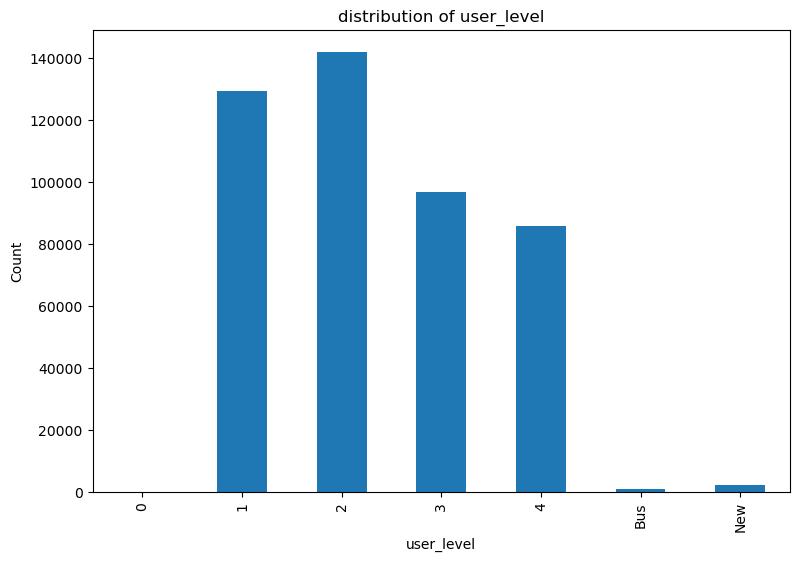

<Figure size 900x600 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'distribution of plus')

Text(0.5, 0, 'plus')

Text(0, 0.5, 'Count')

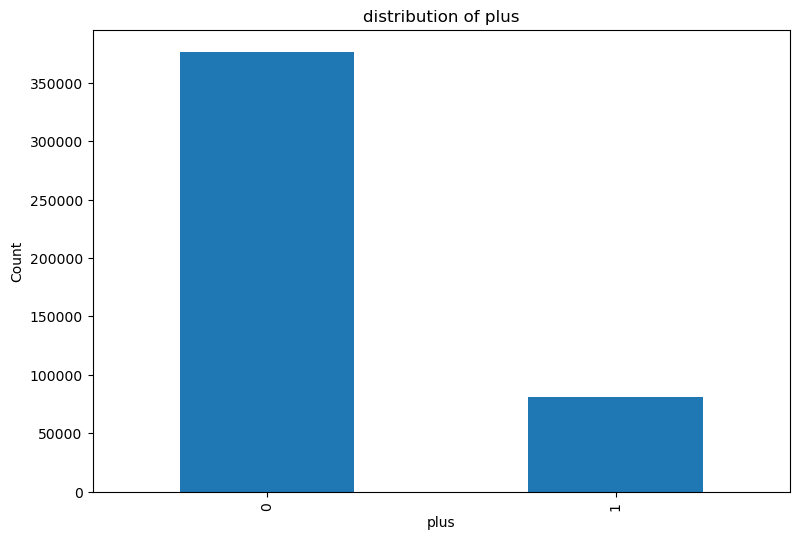

<Figure size 900x600 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'distribution of gender')

Text(0.5, 0, 'gender')

Text(0, 0.5, 'Count')

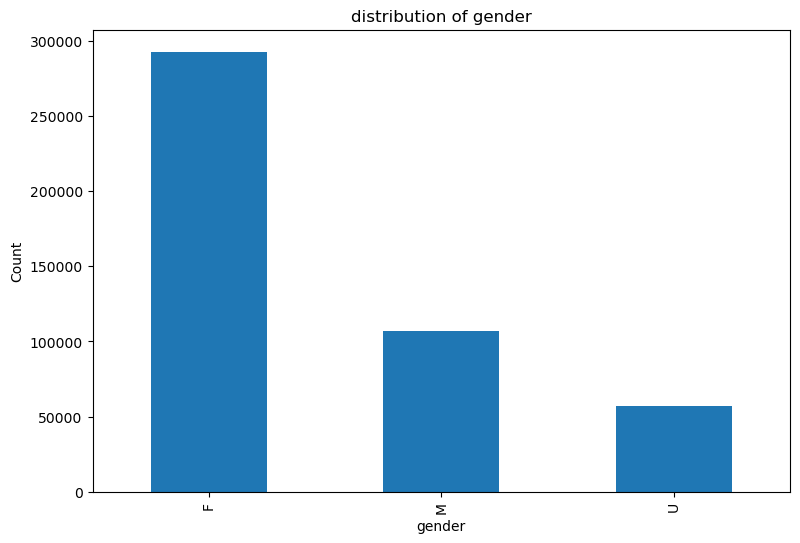

<Figure size 900x600 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'distribution of age')

Text(0.5, 0, 'age')

Text(0, 0.5, 'Count')

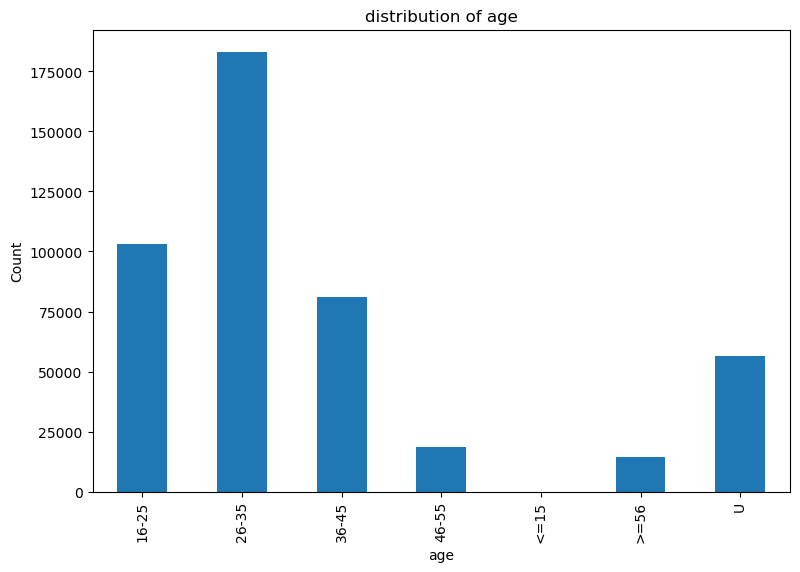

<Figure size 900x600 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'distribution of marital_status')

Text(0.5, 0, 'marital_status')

Text(0, 0.5, 'Count')

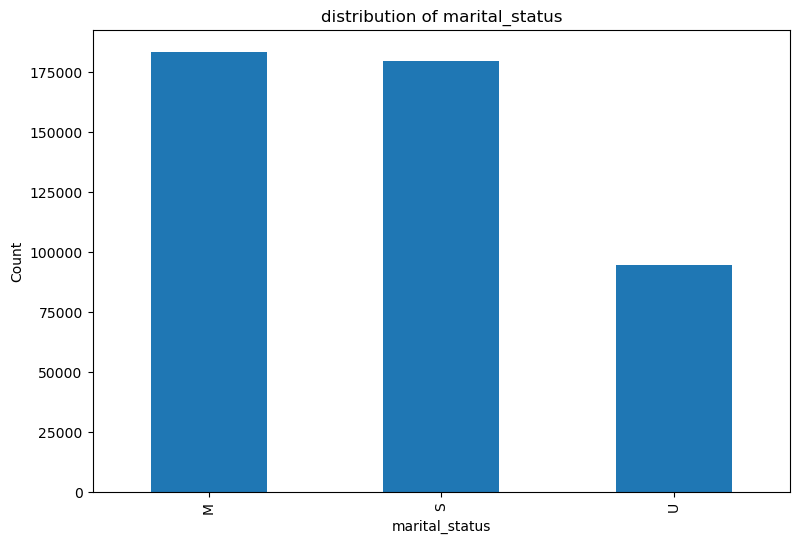

<Figure size 900x600 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'distribution of education')

Text(0.5, 0, 'education')

Text(0, 0.5, 'Count')

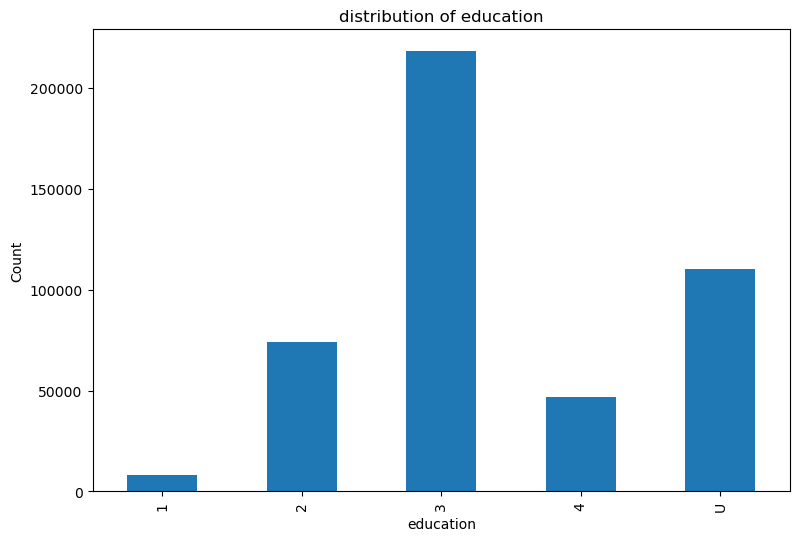

<Figure size 900x600 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'distribution of city_level')

Text(0.5, 0, 'city_level')

Text(0, 0.5, 'Count')

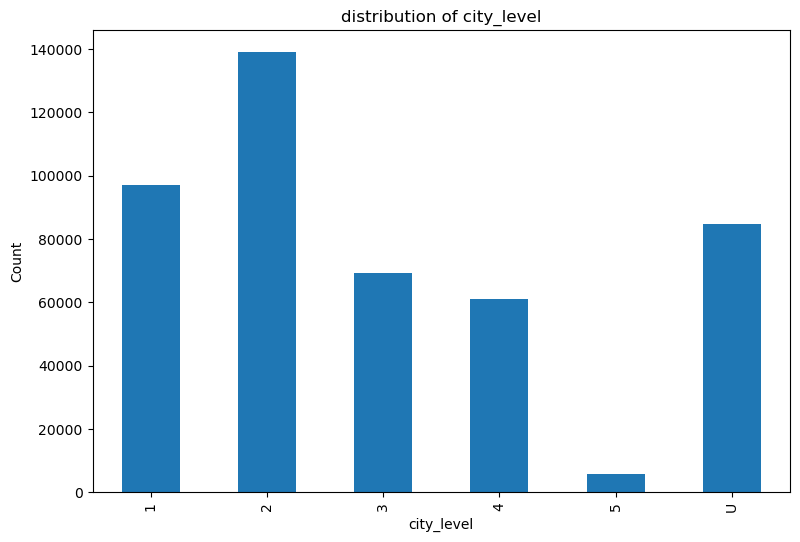

<Figure size 900x600 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'distribution of purchase_power')

Text(0.5, 0, 'purchase_power')

Text(0, 0.5, 'Count')

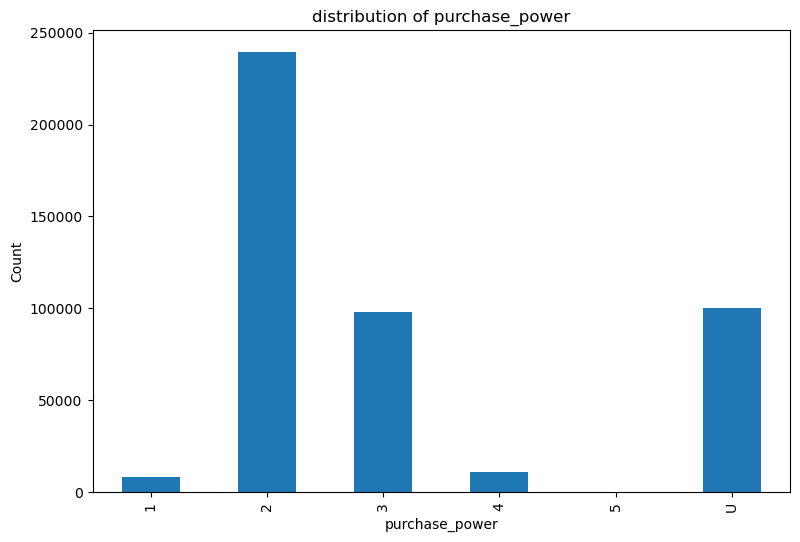

In [34]:
# To create charts we need to import matplotlib library
import matplotlib.pyplot as plt
# to reduce the steps and as question mentioned to use a loop i will just create a variable as categorical variables
cat_variables = ['user_level', 'plus', 'gender', 'age', 'marital_status', 'education', 'city_level', 'purchase_power']
for  var in cat_variables:
    plt.figure(figsize=(9,6))
    # figure() fn is used to create a new figure
    user[var].value_counts().sort_index().plot(kind='bar')
    # I just used value_counts() fn to return objects contaoning counts of unique values
    # To sort objects by labels along the given axis I will used sort_index() fn
    plt.title('distribution of ' + var)
    # title() used to apecify title of the graph
    plt.xlabel(var)
    plt.ylabel('Count')
    # xlabel and ylabel is used to set the label for the x axis and y axis
    plt.show()

<Figure size 900x600 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Distribution of education level:')

Text(0.5, 0, 'education')

Text(0, 0.5, 'Count')

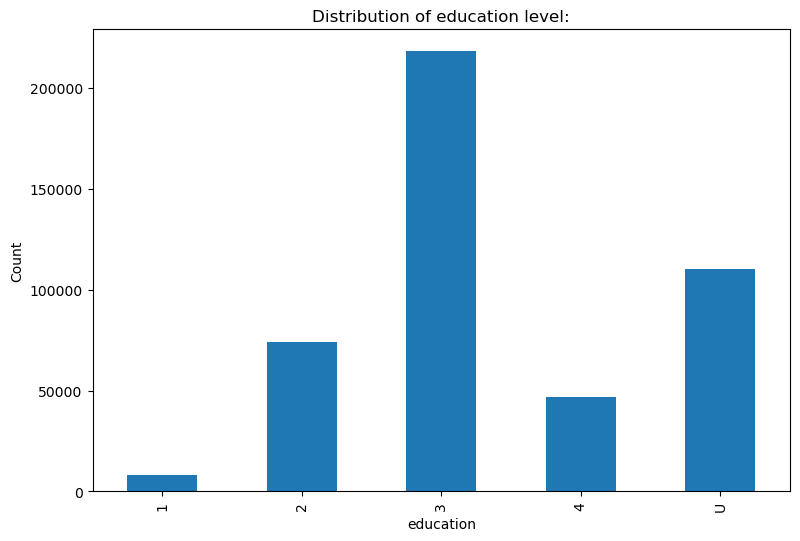

In [35]:
# to know the education level of majority i will create a bar graph
plt.figure(figsize=(9,6))
user['education'].value_counts().sort_index().plot(kind='bar')
# I just used value_counts() fn to return objects contaoning counts of unique values
# To sort objects by labels along the given axis I will used sort_index() fn
plt.title('Distribution of education level:')
# title() used to apecify title of the graph
plt.xlabel('education')
plt.ylabel("Count")
# xlabel and ylabel is used to set the label for the x axis and y axis
plt.show()

<Figure size 900x600 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Distribution of age level:')

Text(0.5, 0, 'age')

Text(0, 0.5, 'Count')

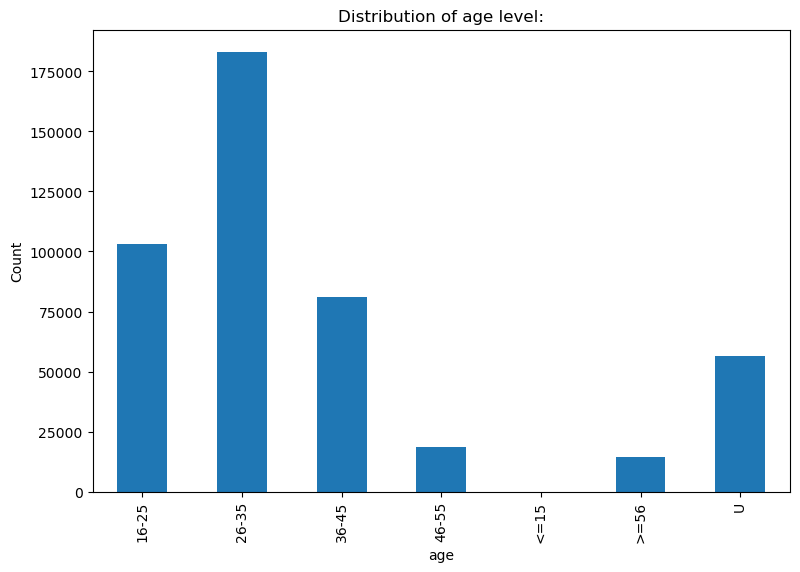

In [36]:
# to know the education level of majority i will create a bar graph
plt.figure(figsize=(9,6))
user['age'].value_counts().sort_index().plot(kind='bar')
# I just used value_counts() fn to return objects contaoning counts of unique values
# To sort objects by labels along the given axis I will used sort_index() fn
plt.title('Distribution of age level:')
# title() used to apecify title of the graph
plt.xlabel('age')
plt.ylabel("Count")
# xlabel and ylabel is used to set the label for the x axis and y axis
plt.show()

25. Next we move to the table that resulted from Q11-Q15. Sum the quantity by day (we created this variable in Q14.) and save the results.
Create a line graph based on it. Hint: The outcome of the sum is a Pandas Series. Use the .index to get the day and .values to get the sum for the plot.<br>
Or you may use reset_index() to turn the results to a dataframe.
Which day has the most quantity sold? 

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Daily Quantity Sold')

Text(0.5, 0, 'Day')

Text(0, 0.5, 'Total qunatity that sold')

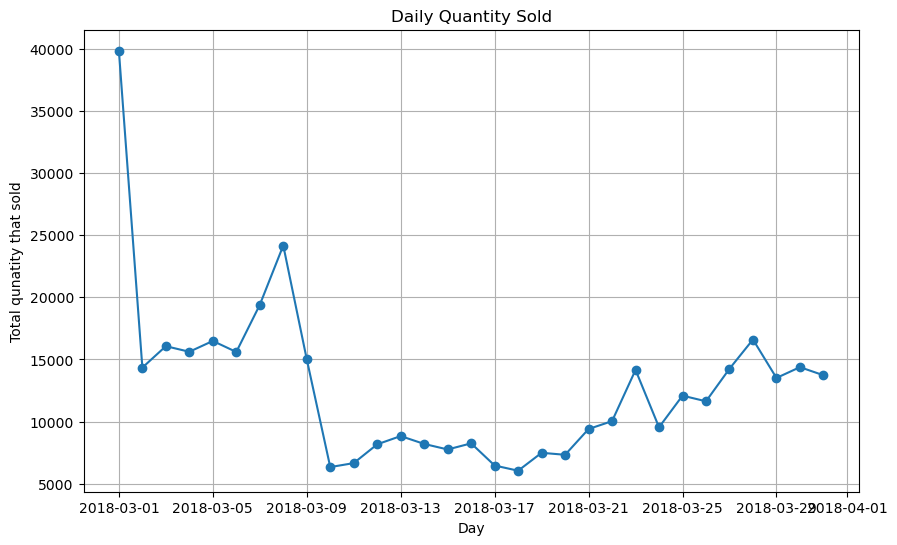

Day with most quantity sold is  2018-03-01 00:00:00 and the quantity that sold is 39822


In [37]:
# The question is about the sum the quantity by day
daily_quantity_sum = merged_data.groupby('order_date')['quantity'].sum()
# here i created the variable that grouped the data by date 
plt.figure(figsize=(10,6))
plt.plot(daily_quantity_sum.index,daily_quantity_sum.values, marker='o')
# here the marker argument is to emphasize each point with specified marker
plt.title('Daily Quantity Sold')
 # title() used to apecify title of the graph
plt.xlabel('Day')
plt.ylabel('Total qunatity that sold')
# xlabel and ylabel is used to set the label for the x axis and y axis
plt.grid(True)
plt.show()
max_quantity_day=daily_quantity_sum.idxmax()
# idxmax() will return the series with the index of max vlue for each column
max_quantity_sold=daily_quantity_sum.max()
# max() fn I used here returns the item with highest value
print('Day with most quantity sold is ',max_quantity_day, 'and the quantity that sold is',max_quantity_sold)

26. Repeat Q25 for variable 'order_hour' we created in Q14. When is the peak time for orders during a day? Can you describe the customer order trend over a day's time?

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Hourly Quantity Sold')

Text(0.5, 0, 'Hour of the day')

Text(0, 0.5, 'Total qunatity that sold')

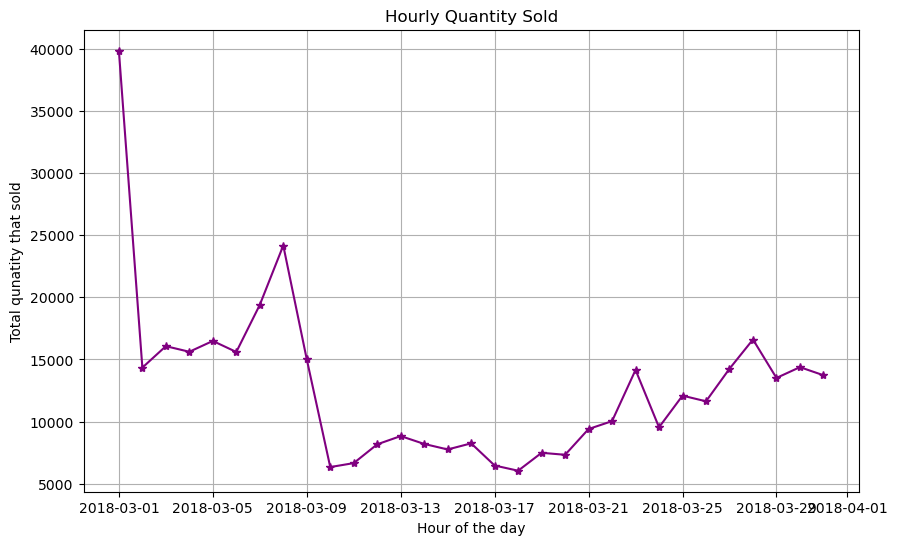

Hour with most quantity sold is  10 and the quantity that sold is  30379


In [38]:
merged_data['order_time']=pd.to_datetime(merged_data['order_time'])
merged_data['hour']=merged_data['order_time'].dt.hour
# The question is about the sum the quantity by day
hourly_quantity_sum = merged_data.groupby('hour')['quantity'].sum()
# here i created the variable that grouped the data by date 
plt.figure(figsize=(10,6))
plt.plot(daily_quantity_sum.index,daily_quantity_sum.values, marker='*',color='purple')
# here the marker argument ios to emphasize each point with specified marker, color specifies in which color the graph should be
plt.title('Hourly Quantity Sold')
# title() used to apecify title of the graph
plt.xlabel('Hour of the day')
plt.ylabel('Total qunatity that sold')
# xlabel and ylabel is used to set the label for the x axis and y axis
plt.grid(True)
plt.show()
peak_quantity_hour= hourly_quantity_sum.idxmax()
# idxmax() will return the series with the index of max value for each column
peak_quantity_sold= hourly_quantity_sum.max()
# max() fn I used here returns the item with highest value
print('Hour with most quantity sold is ',peak_quantity_hour, 'and the quantity that sold is ',peak_quantity_sold)

27. Examine variable original_unit_price .<br>

1) Using describe() to check the stastitics. What is min, max and median?

In [39]:
# to check basic stastice we will use describe() fn
print('Basic stastics of orginal_unit_price:')
orginal_unit_price_stats=merged_data['original_unit_price'].describe()
print(orginal_unit_price_stats)
print('Minimum original unit price:', orginal_unit_price_stats['min'])
print('Maximum original unit price:', orginal_unit_price_stats['max'])
print('Median of original unit price:', orginal_unit_price_stats['50%'])

Basic stastics of orginal_unit_price:
count    326862.000000
mean        116.821854
std          88.845661
min           0.000000
25%          66.000000
50%          80.000000
75%         149.000000
max        7130.000000
Name: original_unit_price, dtype: float64
Minimum original unit price: 0.0
Maximum original unit price: 7130.0
Median of original unit price: 80.0


2) Find out the percentage of observations whose original_unit_price is greater than 350. Delete those observations using filtering. We will use the filtered dataset from now on.

In [40]:
# to find the  percentage of observations whose original_unit_price is greater than 350
per_above_350=(merged_data['original_unit_price']>350).mean()*100
print('Percentage of observations with original_unit_price is greater than 350:\n',per_above_350,'%')
# i am filtering the data to remove observations less than 350
filter_data= merged_data[merged_data['original_unit_price']<=350]
print('Shape of filter_data:', filter_data.shape)

Percentage of observations with original_unit_price is greater than 350:
 0.6290116318201565 %
Shape of filter_data: (324806, 27)


3) Examine the distribution of original_unit_price, using bins range from 0 to 350, width 10. Which price range has the most orders?

<Figure size 1000x600 with 0 Axes>

(array([2.6801e+04, 3.6630e+03, 1.6820e+03, 4.5640e+03, 4.9670e+03,
        3.2929e+04, 3.1539e+04, 5.7251e+04, 1.9267e+04, 1.4141e+04,
        8.4430e+03, 5.5720e+03, 1.3104e+04, 1.6164e+04, 9.5820e+03,
        5.3300e+03, 2.4780e+03, 1.2135e+04, 3.3870e+03, 5.3610e+03,
        8.1100e+02, 6.3500e+02, 5.0000e+01, 2.6950e+03, 5.8090e+03,
        2.8450e+03, 2.0040e+03, 3.1800e+02, 4.3000e+02, 2.7036e+04,
        9.9100e+02, 3.2000e+01, 5.1800e+02, 2.2650e+03, 7.0000e+00]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
        130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250,
        260, 270, 280, 290, 300, 310, 320, 330, 340, 350]),
 <BarContainer object of 35 artists>)

Text(0.5, 1.0, 'Distribution of original_unit_price ')

Text(0.5, 0, 'original unit price')

Text(0, 0.5, 'Number of Orders')

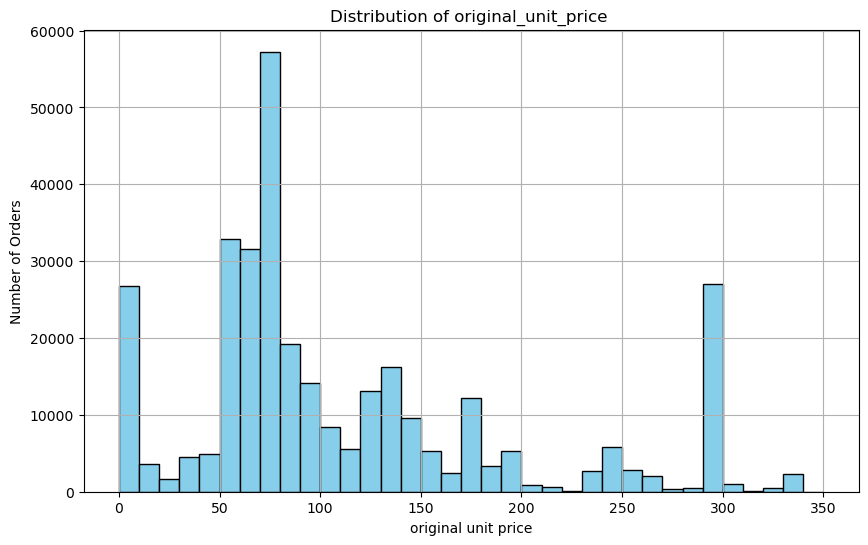

Price range with the most orders: (70.0, 80.0]


In [41]:
# I will just making a figure
plt.figure(figsize=(10,6))
plt.hist(filter_data['original_unit_price'], bins=range(0,360,10),color='Skyblue',edgecolor='black')
plt.title('Distribution of original_unit_price ')
# title() used to apecify title of the graph
plt.xlabel('original unit price')
plt.ylabel('Number of Orders')
# xlabel and ylabel is used to set the label for the x axis and y axis
plt.grid(True)
plt.show()
most_order_price_range= filter_data['original_unit_price'].value_counts(bins=range(0,360,10)).idxmax()
print('Price range with the most orders:', most_order_price_range)

28. Examine the distribution of final_unit_price, using bins range from -20 to 350, width 10. Comparing to original unit prices, how are the final prices different?

<Figure size 1000x600 with 0 Axes>

(array([2.6801e+04, 3.6630e+03, 1.6820e+03, 4.5640e+03, 4.9670e+03,
        3.2929e+04, 3.1539e+04, 5.7251e+04, 1.9267e+04, 1.4141e+04,
        8.4430e+03, 5.5720e+03, 1.3104e+04, 1.6164e+04, 9.5820e+03,
        5.3300e+03, 2.4780e+03, 1.2135e+04, 3.3870e+03, 5.3610e+03,
        8.1100e+02, 6.3500e+02, 5.0000e+01, 2.6950e+03, 5.8090e+03,
        2.8450e+03, 2.0040e+03, 3.1800e+02, 4.3000e+02, 2.7036e+04,
        9.9100e+02, 3.2000e+01, 5.1800e+02, 2.2650e+03, 7.0000e+00]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
        130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250,
        260, 270, 280, 290, 300, 310, 320, 330, 340, 350]),
 <BarContainer object of 35 artists>)

(array([8.9000e+01, 1.9620e+03, 2.9865e+04, 4.7890e+03, 1.0523e+04,
        3.7821e+04, 3.6635e+04, 4.2602e+04, 3.5412e+04, 1.9201e+04,
        9.4270e+03, 1.1270e+04, 1.1681e+04, 4.6090e+03, 1.0485e+04,
        5.0830e+03, 4.6640e+03, 5.4450e+03, 7.9960e+03, 1.7980e+03,
        2.1200e+03, 3.4790e+03, 1.0715e+04, 2.4290e+03, 8.0320e+03,
        2.4030e+03, 2.5380e+03, 6.8500e+02, 2.8700e+02, 2.3400e+02,
        1.3600e+02, 2.8800e+02, 7.1000e+01, 1.4000e+01, 5.0000e+00,
        1.3000e+01, 0.0000e+00]),
 array([-20, -10,   0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100,
        110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230,
        240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350]),
 <BarContainer object of 37 artists>)

Text(0.5, 1.0, 'Distribution of original and final unit price ')

Text(0.5, 0, 'Unit price')

Text(0, 0.5, 'Number of Orders')

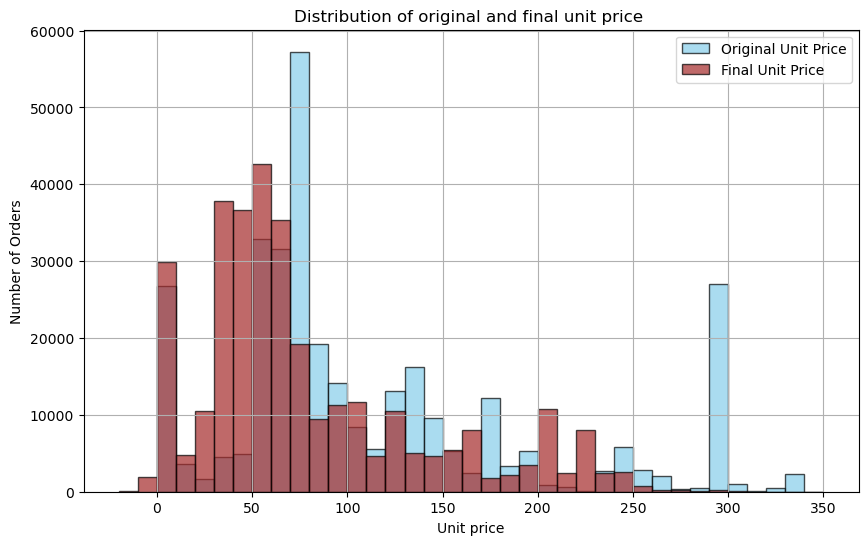

In [42]:
# I will just making a figure
plt.figure(figsize=(10,6))
plt.hist(filter_data['original_unit_price'], bins=range(0,360,10),color='Skyblue',edgecolor='black',alpha=0.7,label='Original Unit Price')
plt.hist(filter_data['final_unit_price'], bins=range(-20,360,10),color='brown',edgecolor='black', alpha=0.7,label='Final Unit Price')
plt.title('Distribution of original and final unit price ')
# title() used to apecify title of the graph
plt.xlabel('Unit price')
plt.ylabel('Number of Orders')
# xlabel and ylabel is used to set the label for the x axis and y axis
plt.legend()
plt.grid(True)
plt.show()

29. Create a new variable 'sales', which is equal to the multiplication of quantity and final unit price. Make a graph for sales by day as in Q25.

C:\Users\asneh\AppData\Local\Temp\ipykernel_6640\2573243567.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_data['sales']= filter_data['quantity']* filter_data['final_unit_price']


<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Daily Sales')

Text(0.5, 0, 'Day')

Text(0, 0.5, 'Total Sales')

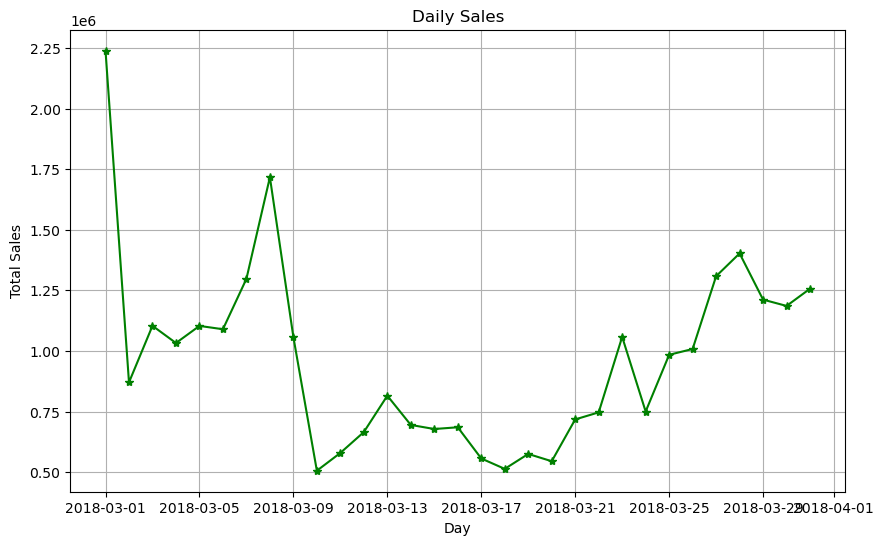

In [43]:
filter_data['sales']= filter_data['quantity']* filter_data['final_unit_price']
daily_sales_sum= filter_data.groupby('order_date')['sales'].sum()
plt.figure(figsize=(10,6))
plt.plot(daily_sales_sum.index,daily_sales_sum.values,marker='*',linestyle='-',color='green')
plt.title('Daily Sales')
# title() used to apecify title of the graph
plt.xlabel('Day')
plt.ylabel('Total Sales')
# xlabel and ylabel is used to set the label for the x axis and y axis
plt.grid(True)
plt.show()

30. Try to answer one descriptive question you asked in your project initial report.

In [44]:
specific_sku='01c9d91829'
specific_day='2018-03-01 '
filter_data_sku_day = order[(order['sku_ID']== specific_sku) & (order['order_date']== specific_day)]
filter_data_sku_day['sales'] =filter_data_sku_day['quantity']* filter_data_sku_day['final_unit_price']
total_sales_sku_day=filter_data_sku_day['sales'].sum()
print('Total sales for sku', specific_sku, 'on',specific_day,':$', total_sales_sku_day)

Total sales for sku 01c9d91829 on 2018-03-01  :$ 0.0


## DESCRPTIVE QUESTIONS

1. Which brand is most frequently ordered by customers?

The most frequently ordered brand is 198cec62a1 with 1231 orders.


<Figure size 1000x600 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Top 10 Brand ID Order counts')

Text(0.5, 0, 'Brand ID')

Text(0, 0.5, 'Number of Orders')

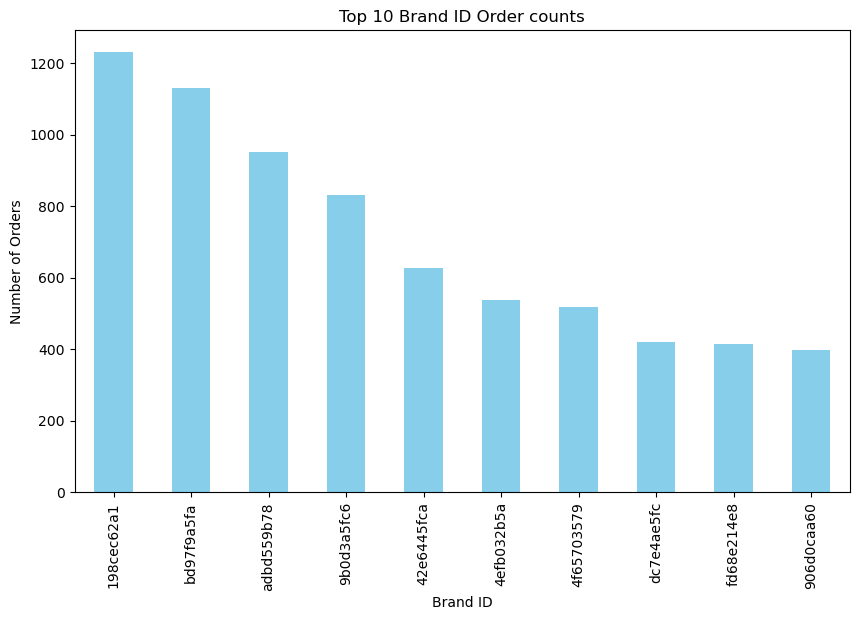

In [45]:
sku= pd.read_csv("D:\JD Data\JD_Sku_data.csv")
brand_order_counts = sku['brand_ID'].value_counts()
most_frequent_brand = brand_order_counts.idxmax()
count_most_frequent_brand = brand_order_counts.max()
print('The most frequently ordered brand is', most_frequent_brand,'with', count_most_frequent_brand,'orders.')
import matplotlib.pyplot as plt
top_10_brands = brand_order_counts.head(10)
plt.figure(figsize=(10, 6))
top_10_brands.plot(kind='bar', color='skyblue')
plt.title('Top 10 Brand ID Order counts')
plt.xlabel('Brand ID')
plt.ylabel('Number of Orders')
plt.show()

2. What is the average number of deliveries shipped out per day?

In [46]:
delivery['ship_out_time'] = pd.to_datetime(delivery['ship_out_time'])
delivery['ship_out_date'] = delivery['ship_out_time'].dt.date
average_deliveries_per_day = delivery.groupby('ship_out_date').size().mean()
print('The average number of deliveries shipped out per day is', average_deliveries_per_day)

The average number of deliveries shipped out per day is 8145.25


3. Which channel is most frequently used by users to place orders?

The most frequently used channel for placing orders is app with 15107411 orders.


<AxesSubplot:>

Text(0.5, 1.0, 'Channel Order Counts')

Text(0.5, 0, 'Channel')

Text(0, 0.5, 'Number of Orders')

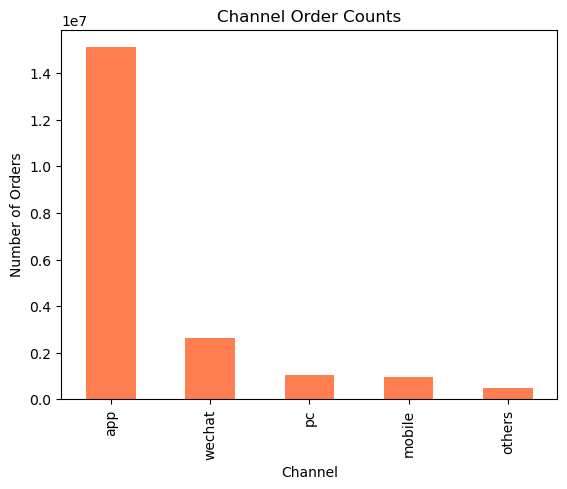

In [47]:
click= pd.read_csv("D:\JD Data\JD_click_data.csv")
channel_order_counts = click['channel'].value_counts()
most_frequent_channel = channel_order_counts.idxmax()
count_most_frequent_channel = channel_order_counts.max()
print('The most frequently used channel for placing orders is', most_frequent_channel, 'with', count_most_frequent_channel, 'orders.')
channel_order_counts.plot(kind='bar', color='coral')
plt.title('Channel Order Counts')
plt.xlabel('Channel')
plt.ylabel('Number of Orders')
plt.show()


4. What type of product is most preferred by customers?

The most preferred product type by customers is 2  with 30701 occurrences


<Figure size 1000x600 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Product Type Counts')

Text(0.5, 0, 'Product Type')

Text(0, 0.5, 'Number of Occurrences')

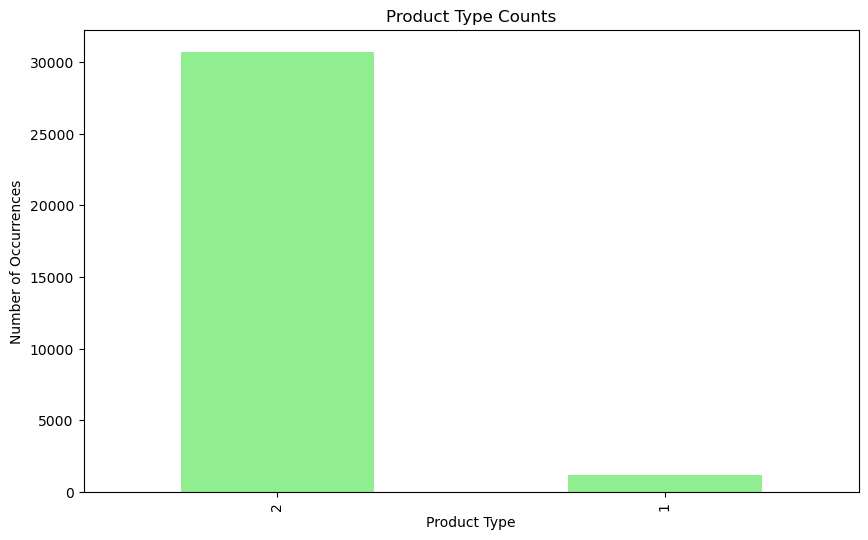

In [48]:
product_type_counts = sku['type'].value_counts()
most_preferred_type = product_type_counts.idxmax()
count_most_preferred_type = product_type_counts.max()
print('The most preferred product type by customers is', most_preferred_type,' with',count_most_preferred_type, 'occurrences')
plt.figure(figsize=(10, 6))
product_type_counts.plot(kind='bar', color='lightgreen')
plt.title('Product Type Counts')
plt.xlabel('Product Type')
plt.ylabel('Number of Occurrences')
plt.show()

5. What is the average number of distinct SKUs available at each distribution center per week?

In [49]:
inventory['date'] = pd.to_datetime(inventory['date'])
inventory['week'] = inventory['date'].dt.isocalendar().week
distinct_skus_per_week = inventory.groupby(['dc_ID', 'week'])['sku_ID'].nunique()
average_skus_per_dc_per_week = distinct_skus_per_week.groupby('dc_ID').mean()
print("Average number of distinct SKUs available at each distribution center per week:")
print(average_skus_per_dc_per_week)

Average number of distinct SKUs available at each distribution center per week:
dc_ID
1      60.80
2     246.20
3     241.20
4     219.60
5     246.00
6     100.80
7     240.00
8      47.00
9     238.00
10    243.00
11     64.20
12     40.40
13     67.20
14     47.80
15     32.80
19     48.20
20    122.20
21     32.60
24    236.40
25     86.00
26     82.40
27     33.20
28     97.40
31    108.80
32     85.00
33     63.60
34     59.60
35     59.60
36     94.20
37     77.40
38     77.20
39     91.80
40     83.40
41     95.40
42     99.40
43     99.00
44    105.20
45     84.80
46     82.00
47     74.60
50     91.00
51     74.80
52     89.00
53     87.40
54     75.00
55    104.00
56      5.20
57      1.75
58      9.40
59      6.40
61     78.20
63      1.00
64     70.40
65      1.60
66     34.00
67     75.20
Name: sku_ID, dtype: float64


We want to use two sets of features to make predictions.<br>
1. order effect: This class of predictors captures thevcharacteristics of an order that may impact deliveryvtime, such as the number of items (SKUs), order size (quantity), order type (1P or 3P), discount rate and the number of gift items.<br>
2. User effect: The process may prioritize certain customers over others, for example, customers with a PLUSmembership or higher past purchase values.<br>
Note: Actually, it will be better if we can include real-time workloads of distribution centers. It can be done with this dataset, but might be a little too much for us. So, we will leave that part out.

31. The dataset we have so far is based on order-items. Each row is an item in an order. Now we need to aggregate by order to match order information with delivery information. Afterwards, each row is about one delivery / one order because we have already removed orders that have multiple deliveries.

First, let's calculate order values by multiply price and quantity.

In [50]:
# Original value of items
merged_data['originValue'] = merged_data['original_unit_price'] \
                                        * merged_data['quantity']

# Final value of items                                    
merged_data['finalValue'] = merged_data['final_unit_price'] \
                                    * merged_data['quantity']                                   

Next we aggregate by each order. <br>
Please pay attention to the variable names. They should be consistent with yours. Make changes when necessary. <br>

Variables that are the same across one order:<br>
user_ID<br>
order type - type_x<br>
delivery time - delivery_time<br>
order day - order_day<br>
order hour - order_hour<br>
<br>
<br>
Variables to be aggregated across one order:<br>
sku_ID - to count to calculate the number of different products<br>
quantity - to sum to calculate the order size<br>
originValue - to sum to calculate sales value with the original price<br>
finalValue - to sum to calculate final sales value<br>
discount rate<br>
gift_item - to sum to calculate the number of gift items<br>

Therefore, we need to do the following:<br>

1. For variables that are the same across one order, we can use the 'first' method to keep the value in the groupby result.<br>
2. For variables to be aggregated, we specify aggregation for each of them.<br>
3. We can use a dictionary to put all actions together.

In [51]:
agg_dict = {
    'user_ID': 'first',
    'type': 'first',
    'delivery_time': 'first',
    'order_day': 'first',
    'order_hour':'first',
    'sku_ID': 'count',
    'quantity': 'sum',
    'originValue': 'sum',
    'finalValue': 'sum',
    'gift_item': 'sum'
}

order_agg = merged_data.groupby('order_ID').agg(agg_dict).reset_index()
order_agg.head()

,order_ID,user_ID,type,delivery_time,order_day,order_hour,sku_ID,quantity,originValue,finalValue,gift_item
0,0000095025,57648ed1fc,1,0 days 22:48:26,19,11,1,1,230.0,176.2,0
1,00000e13eb,c113527e40,0,2 days 05:19:18,9,12,1,1,56.0,56.0,0
2,0000132b39,c4f5626c0d,1,0 days 22:29:25,13,16,1,1,89.0,85.0,0
3,000064fa67,99439045cb,1,0 days 08:03:43,2,10,2,2,298.0,208.0,1
4,0000bde331,20d84fc11a,1,0 days 21:37:06,17,14,1,1,59.9,39.9,0


32. Merge user table with this aggregated order table.

In [52]:
order_user = pd.merge(order_agg, user, on = 'user_ID', how = 'inner')

33. We need to code a few more variables.

In [53]:
# First we remove the orders with originValue is 0
order_user = order_user[order_user['originValue'] != 0]

In [54]:
# Discount rate
order_user['dis_rate'] = (order_user['originValue'] - order_user['finalValue'])/order_user['originValue']
# order_hour coded to be busy vs. not busy
order_user['busy_hour'] = order_user['order_hour'].apply(lambda h: 1 if 8<=h<=22 else 0)

34. Prepare data for analysis. The target variable is 'delivery_time'.<br>
Features: 'type_x', 'sku_ID', 'quantity', 'finalValue', 'gift_item', 'plus', 'dis_rate', 'busy_hour'

In [55]:
order_user['hourly_delivery_time'] = order_user['delivery_time'].dt.total_seconds()/3600
Target = 'hourly_delivery_time'
features = ['type','sku_ID','quantity', 'finalValue', 'gift_item', 'plus', 'dis_rate', 'busy_hour']

In [56]:
X = order_user[features]
y = order_user[Target]

35. Prepare the training and test datasets

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
X_train.shape
X_test.shape

(224124, 8)

(56031, 8)

36. Train a Decision Tree regression model.

In [59]:
from sklearn.tree import DecisionTreeRegressor
tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

37. Make predictions on the testing data.

In [60]:
y_Pred = tree_regressor.predict(X_test)
y_Pred

array([23.89138889, 21.52557724, 64.56478614, ..., 45.36681063,
       70.4215    , 24.19888301])

38. Evaluate the model using RMSE

In [61]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test, y_Pred, squared=False)
print('RMSE:', rmse)

RMSE: 26.61946021259986


In [62]:
# To understand the RMSE, We check the statistics of the target variable.
order_user['delivery_time'].describe()
# It seems the mean is about 34 hours. With RMSE being about 27, 
# the prediction seems not very good.
# If you are interested to explore more, you may try some other prediction methods to see 
# whether you can get better results.

count                       280155
mean     1 days 09:41:04.107469079
std      1 days 04:22:30.757980040
min              -1 days +07:25:00
25%                0 days 17:21:10
50%                0 days 23:33:42
75%                1 days 19:01:48
max               26 days 17:13:03
Name: delivery_time, dtype: object

## PREDICTIVE QUESTION

Can we forecast the sales growth trajectory for JD.com in the next quarter or year?

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'JD data Sales Growth Forecast')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Quantity Sold')

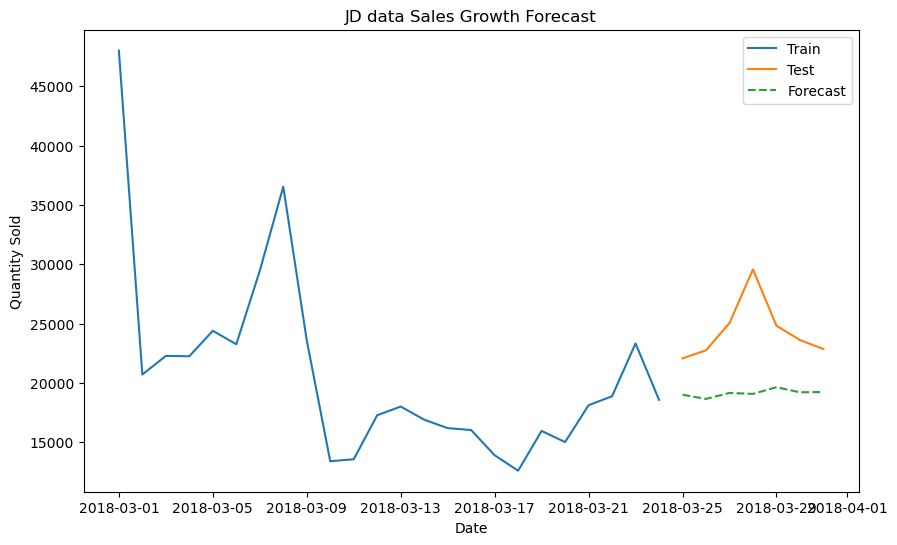

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
sales_data = order[['order_date', 'quantity']].groupby('order_date').sum().reset_index()
sales_data['order_date'] = pd.to_datetime(sales_data['order_date'])
sales_data.set_index('order_date', inplace=True)
sales_data = sales_data.resample('D').sum()
train_size = int(len(sales_data) * 0.8)
train, test = sales_data.iloc[:train_size], sales_data.iloc[train_size:]
order = (5, 1, 0)
model = ARIMA(train, order=order)
fit_model = model.fit()
forecast = fit_model.forecast(steps=len(test)).values
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='Forecast', linestyle='dashed')
plt.title('JD data Sales Growth Forecast')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.legend()
plt.show()